In [25]:
import numpy as np
import pygad
import matplotlib.pyplot as plt
from matplotlib import cm

In [26]:
def rosenbrock(solution, solution_idx):
    x = solution
    x1 = x[1::]
    x2 = x[0:-1]
    factor1 = (x1-x2 ** 2) ** 2
    factor2 = (1 -x2) ** 2
    output = 100 * np.sum(factor1 + factor2)
    fitness = -output
    return(fitness)
def rosenbrock_2d(x, y):
    fx=((1-x)**2) + (100*(y-(x**2))**2)
    return fx

In [27]:
ga_instance_rosenbrock = pygad.GA(num_generations=50,
                       num_parents_mating=2,
                       fitness_func=rosenbrock,
                       sol_per_pop=10,
                       num_genes=2,
                       init_range_low=-5,
                       init_range_high=5,
                       parent_selection_type="sss",
                       keep_parents=1,
                       crossover_type="single_point",
                       mutation_type="random",
                       mutation_percent_genes=10,
                       save_solutions=True)

In [28]:
ga_instance_rosenbrock.run()
soluciones_rosenbrock = ga_instance_rosenbrock.solutions

In [29]:
soluciones_rosenbrock=np.array(soluciones_rosenbrock)

In [35]:
x_min=ga_instance_rosenbrock.best_solution()

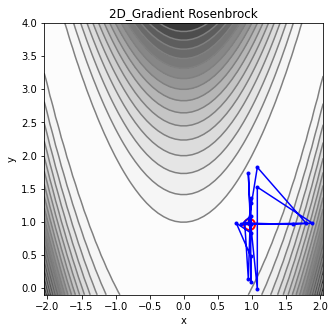

In [39]:
def plot_contour():

    X = np.linspace(start=-2.048, stop=2.048, num=50)
    Y = np.linspace(start=-0.1, stop=4.0, num=50)
    X, Y = np.meshgrid(X, Y)
    Z = rosenbrock_2d(X, Y)

    plt.subplots(figsize=(5, 5))
    plt.gca().contourf(X, Y, Z, cmap=cm.Greys, levels=20, alpha=1.0)
    plt.gca().contour(X, Y, Z, colors="gray", levels=20)
    plt.plot(x_min[0][1],x_min[0][1], "o", color="red", fillstyle="none", markersize=11, markeredgewidth=2)
    plt.plot(x_min[0][1],x_min[0][1], ".", color="red")
    plt.title("2D_Gradient Rosenbrock")
    plt.xlabel("x")
    plt.ylabel("y")

d=len(soluciones_rosenbrock)-20
plot_contour()
plt.plot(soluciones_rosenbrock[d:,0],soluciones_rosenbrock[d:,1], ".-", color="b")
plt.show()